In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


data = pd.read_csv("data_clear.csv") 
d = data.to_numpy() 

N = d.shape[0]

print("number of people: ", N)

normal = d[:,0:12]
slow   = d[:,12:24]
fast   = d[:,24:36]

# 1 -> male
# 2 -> female
sexes = np.array([1,2,1,1,2,1,2,2,2,2,1,1])

number of people:  117


In [150]:
n_value = 0
s_value = 0
f_value = 0

n_total = 0
s_total = 0
f_total = 0

n_correct = []
s_correct = []
f_correct = []

# guessed sex of models (>= 0 is man <= 0 is woman)
n_model = np.zeros(12) 
f_model = np.zeros(12)
s_model = np.zeros(12)

for person in range(N):
    correct = 0
    total = 0
    
    person_n_total = 0
    person_n_value = 0
    person_f_total = 0
    person_f_value = 0
    person_s_total = 0
    person_s_value = 0
    
    for i in range(12):
        if(math.isnan(normal[person, i])):
            continue
            
        if(normal[person, i] == 1):
            n_model[i] += 1
        else:
            n_model[i] -= 1
            
        person_n_total += 1;
        if(normal[person, i] == sexes[i]):
            person_n_value += 1
            
    for i in range(12):
        if(math.isnan(fast[person, i])):
            continue
        
        if(fast[person, i] == 1):
            f_model[i] += 1
        else:
            f_model[i] -= 1
        
        person_f_total += 1
        if(fast[person, i] == sexes[i]):
            person_f_value += 1
        
    for i in range(12):
        if(math.isnan(slow[person, i])):
            continue
            
        if(slow[person, i] == 1):
            s_model[i] += 1
        else:
            s_model[i] -= 1
            
        person_s_total += 1
        if(slow[person, i] == sexes[i]):
            person_s_value += 1
    
    n_total += person_n_total
    n_value += person_n_value
    f_total += person_f_total
    f_value += person_f_value
    s_total += person_s_total
    s_value += person_s_value
    
    if(person_n_total != 0):
        n_correct.append(person_n_value / person_n_total)
    if(person_f_total != 0):
        f_correct.append(person_f_value / person_f_total)
    if(person_s_total != 0):
        s_correct.append(person_s_value / person_s_total)

print(n_value, s_value, f_value, n_total, s_total, f_total)
        
print(n_value / n_total, f_value / f_total, s_value / s_total)

527 438 443 845 846 856
0.6236686390532544 0.5175233644859814 0.5177304964539007


(array([ 3.,  0.,  0.,  1.,  2.,  6.,  9., 20., 25., 12.,  2.,  6.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 <a list of 12 Patch objects>)

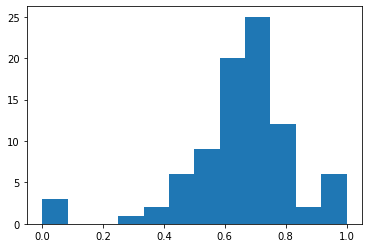

In [151]:
plt.hist(n_correct,bins=12)

(array([ 6.,  0.,  0.,  4., 10., 14., 19., 13., 10.,  6.,  0.,  5.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 <a list of 12 Patch objects>)

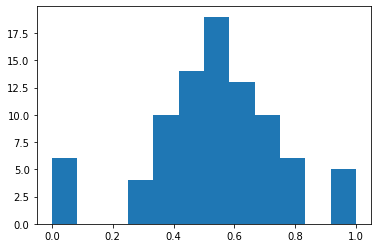

In [152]:
plt.hist(f_correct,bins=12)

(array([ 6.,  0.,  1.,  0.,  7., 20., 17., 15., 17.,  1.,  0.,  4.]),
 array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 <a list of 12 Patch objects>)

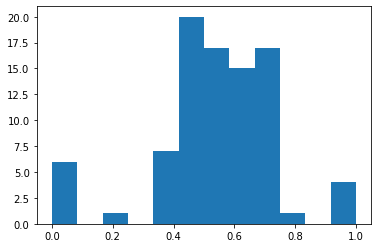

In [153]:
plt.hist(s_correct,bins=12)

In [166]:
print("mean of n_correct = ", np.mean(np.array(n_correct)))
print("mean of f_correct = ", np.mean(np.array(f_correct)))
print("mean of s_correct = ", np.mean(np.array(s_correct)))

print("std of n_correct = ", np.std(np.array(n_correct)))
print("std of f_correct = ", np.std(np.array(f_correct)))
print("std of s_correct = ", np.std(np.array(s_correct)))

mean of n_correct =  0.6201583945769992
mean of f_correct =  0.5049700618666135
mean of s_correct =  0.5071137511478421
std of n_correct =  0.18622765245009024
std of f_correct =  0.2152854718431704
std of s_correct =  0.200394974986149


In [157]:
# people guessed wrong
for i in range(12):
    if(sexes[i] == 1 and n_model[i] < 0 or 
       sexes[i] == 2 and n_model[i] > 0):
        print("wrong guessed sex: ", i, n_model[i])

wrong guessed sex:  1 22.0
wrong guessed sex:  7 28.0
wrong guessed sex:  9 17.0


In [164]:
n_total_score = 0
f_total_score = 0
s_total_score = 0

for i in range(12):
    multiply = 1
    if(sexes[i] == 2):
        multiply = 1
        
    n_total_score += multiply * n_model[i]
    f_total_score += multiply * f_model[i]
    s_total_score += multiply * s_model[i]
        
print(n_total_score, f_total_score, s_total_score)

183.0 -94.0 88.0
